# ¡Hola Julieta! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


-----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Julieta, tu proyecto muestra un trabajo muy bien estructurado desde el inicio, con una correcta carga de datos, una exploración inicial clara y un uso acertado de estadísticas descriptivas y visualizaciones que te permiten entender el comportamiento de las variables y detectar patrones relevantes. Se nota una buena capacidad para interpretar correlaciones, complementar el análisis con gráficos adecuados y mantener un lenguaje cuidadoso al explicar los resultados, especialmente al diferenciar asociaciones estadísticas de posibles interpretaciones causales, además de conectar los hallazgos con implicaciones de negocio de forma coherente. 

Como recomendaciones, podrías afinar algunos detalles técnicos como el tipo de dato de ciertas variables, centralizar la importación de librerías para dar mayor orden al notebook, y reforzar la validación de frecuencias bajas en análisis categóricos o ampliar el análisis a más variables cuando aplique, ya que esto ayuda a que las conclusiones sean más robustas. 

En general, es un trabajo sólido y bien razonado, y con estos ajustes podrás seguir fortaleciendo tanto la claridad técnica como el impacto de tus análisis en proyectos futuros.


¡Te deseo muchos éxitos en tu próximo Sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-----

# Proyecto 7 - Explorando factores de comportamiento en NovaRetail+


NovaRetail+ es una plataforma de comercio electrónico en Latinoamérica con millones de usuarios.

Para el cierre de 2024, el equipo de **Crecimiento y retención** tiene como objetivo responder:

**¿Qué factores del comportamiento del cliente están más fuertemente asociados con el ingreso anual generado?**

> Este proyecto es un análisis **correlacional** (exploratorio).  
> **Correlación ≠ causalidad.**

## Sección 1 - Cargar y explorar el dataset

En esta sección validamos:
- que el dataset cargue correctamente
- tipos de datos
- valores faltantes / rangos generales

Antes de correlacionar, primero entendemos el “terreno”.

In [5]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



### Cargar Dataset

In [6]:
# Cargar el dataset y explorar datos
df = pd.read_csv('/datasets/novaretail_comportamiento_clientes_2024.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 15000 non-null  object 
 1   edad                       15000 non-null  float64
 2   nivel_ingreso              15000 non-null  float64
 3   visitas_mes                15000 non-null  int64  
 4   compras_mes                15000 non-null  int64  
 5   gasto_publicidad_dirigida  15000 non-null  float64
 6   satisfaccion               15000 non-null  float64
 7   miembro_premium            15000 non-null  int64  
 8   abandono                   15000 non-null  int64  
 9   tipo_dispositivo           15000 non-null  object 
 10  region                     15000 non-null  object 
 11  ingreso_anual              15000 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 1.4+ MB


#### Descripción del conjunto de datos

El dataset contiene las siguientes columnas:

- `id_cliente` — Identificador único del cliente.
- `edad` — Edad del cliente.
- `nivel_ingreso` — Ingreso anual estimado del cliente.
- `visitas_mes` — Número de visitas a la aplicación o sitio web durante el mes.
- `compras_mes` — Número de compras realizadas en el mes.
- `gasto_publicidad_dirigida` — Gasto en anuncios asignado al usuario.
- `satisfaccion` — Calificación de satisfacción del cliente en una escala del 1 al 5.
- `miembro_premium` — Indica si el cliente tiene suscripción premium (1) o no (0).
- `abandono` — Indica si el cliente abandonó la plataforma (1) o no (0).
- `tipo_dispositivo` — Tipo de dispositivo utilizado por el cliente (móvil, escritorio o tablet).
- `region` — Región geográfica del cliente (norte, sur, oeste o este).
- `ingreso_anual` — Ingreso anual generado por el cliente para la empresa.

La métrica principal de análisis es `ingreso_anual`, utilizada para evaluar el impacto económico de los clientes.


In [7]:
# mostrar las primeras 5 filas
df.head()


,id_cliente,edad,nivel_ingreso,visitas_mes,compras_mes,gasto_publicidad_dirigida,satisfaccion,miembro_premium,abandono,tipo_dispositivo,region,ingreso_anual
0,CL-100000,44.0,28565.77,9,1,31.36,3.9,0,0,móvil,norte,23.22
1,CL-100001,36.0,29673.44,11,3,24.66,3.7,0,0,tablet,sur,93.47
2,CL-100002,46.0,30642.95,9,0,0.00,2.9,0,0,móvil,este,0.00
3,CL-100003,56.0,39468.61,8,0,6.81,3.1,0,0,móvil,este,0.00
4,CL-100004,35.0,22527.83,9,2,26.49,2.3,0,0,móvil,sur,33.76


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido.

</div>

## Sección 2 - Preparar datos y documentar supuestos

### Exploración y Limpieza

💡
Después de analizar la información anterior, completa la siguiente sección.  
- Si aplica, señala la o las columnas que requieren algun cambio

Recuerda eliminar este bloque de texto antes de subir el proyecto a tu portafolio.


#### Exploración inicial de los datos
El conjunto de datos contiene **15,000 registros** y **12 columnas**, sin valores nulos.

**Variables numéricas**  
Se identifican las siguientes columnas numéricas:
- `edad`
- nivel_ingreso
- visitas_mes
- gasto_publicidad_dirigida
- satisfaccion
- ingreso anual

La mayoría de estas variables presentan tipos de datos adecuados para el análisis correlacional y no requieren transformaciones adicionales en esta etapa.

**Variables binarias**  
Las siguientes columnas representan variables binarias:
- `miembro_premium`
- `abandono`

Ambas están codificadas como 0 y 1, **no requieren transformación adicional**.

**Variables categóricas**  
Se identifican las siguientes columnas categóricas:
- `id_cliente`
- `tipo_dispositivo`
- `region`

Estas variables están correctamente definidas como categóricas y se utilizarán únicamente en análisis de asociación adecuados para este tipo de datos.

In [8]:
# No se requieren correcciones de tipo de dato en esta etapa



<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Aunque numéricamente la *edad* se puede trabajar como un `float`, puede resultar más apropiado convertirlo a `int`, ya que es la forma en la que normalmente hablamos sobre esta variable

</div>

In [ ]:
# verificar cambios
df.info()

#### Explorar variables numéricas

In [9]:
# Estadísticas descriptivas de variables numéricas
df[
    ['edad','nivel_ingreso','visitas_mes','compras_mes',
     'gasto_publicidad_dirigida','satisfaccion','ingreso_anual']
].describe().T


,count,mean,std,min,25%,50%,75%,max
edad,15000.0,38.262400,11.492378,18.0,30.0000,38.000,46.0000,75.00
nivel_ingreso,15000.0,30019.704782,9833.166305,8000.0,23127.0975,30023.745,36768.4400,74790.84
visitas_mes,15000.0,10.029000,3.158189,1.0,8.0000,10.000,12.0000,25.00
compras_mes,15000.0,1.206467,1.105284,0.0,0.0000,1.000,2.0000,8.00
gasto_publicidad_dirigida,15000.0,20.149301,10.880724,0.0,12.3100,19.730,27.2925,75.51
satisfaccion,15000.0,3.603693,0.685300,1.0,3.1000,3.600,4.1000,5.00
ingreso_anual,15000.0,36.594180,34.484888,0.0,0.0000,30.705,58.2200,244.69


✍️ **Comentario**: 
Diagnóstico inicial de variables numéricas

edad — Presenta un rango amplio de edades adultas, sin valores extremos evidentes.

nivel_ingreso — Muestra variabilidad considerable entre clientes, consistente con distintos perfiles socioeconómicos.

visitas_mes — Indica diferentes niveles de interacción con la plataforma.

compras_mes — Presenta valores bajos para una parte importante de los usuarios, lo cual es común en plataformas de comercio electrónico.

gasto_publicidad_dirigida — Incluye valores cero y valores positivos, lo que sugiere asignación diferenciada de campañas.

satisfaccion — Se concentra dentro del rango esperado (1–5).

ingreso_anual — Variable objetivo con alta dispersión, adecuada para análisis correlacional.

#### Explorar variables binarias

In [10]:
# Verificar que cada columna tenga únicamente dos valores posibles
for col in ['miembro_premium','abandono']:
    print(col, df[col].unique())


miembro_premium [0 1]
abandono [0 1]


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Usar `unique` es apropiado para validar que las varibles realmente si manejen valores binarios.

También pueds usar `value_counts(normalize=True)` para determinar la propoción que tiene categoría en las variables binarias

</div>

✍️ **Comentario**: 
Diagnóstico inicial de variables binarias

miembro_premium — Variable binaria correctamente codificada, representa el estatus de suscripción.

abandono — Variable binaria que indica si el cliente abandonó la plataforma, adecuada para análisis punto-biserial.



#### Explorar variables categóricas

In [11]:
# Verificar el número de valores únicos por variable categórica
df['tipo_dispositivo'].value_counts(normalize=True) * 100


móvil         65.453333
escritorio    24.800000
tablet         9.746667
Name: tipo_dispositivo, dtype: float64

In [12]:
# Explorar variables categóricas y cómo se distribuyen
df['region'].value_counts(normalize=True) * 100


norte    29.30
oeste    25.40
sur      24.84
este     20.46
Name: region, dtype: float64

✍️ **Comentario**: 
Diagnóstico inicial de variables categóricas

tipo_dispositivo — Los clientes se distribuyen entre móvil, escritorio y tablet, permitiendo análisis comparativos por canal.

region — La distribución regional permite evaluar asociaciones geográficas sin concentraciones extremas.

### Supuestos

- El análisis se realiza utilizando **todo el conjunto de datos disponible**.
- Los datos no presentan errores y están correctamente tipificados.
- Se utilizan distintos coeficientes según el tipo de variable:
  - **Pearson** asume relaciones lineales entre variables numéricas.
  - **Spearman** evalúa relaciones monótonas y no requiere normalidad.
  - **Punto biserial** se usa para relaciones numérica–binaria.
  - **Cramér (V)** se usa para asociaciones entre variables categóricas.

**Supuesto central:**  
Este análisis identifica relaciones entre variables o segmentos, pero no prueba causalidad.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo Julieta, el uso de estadísticas descriptivas y la verificación de valores únicos permiten detectar rápidamente comportamientos esperados y posibles inconsistencias.

</div>

## Sección 3 - Visualización de relaciones

Observamos cómo se relacionan las variables numéricas.

### Heatmap

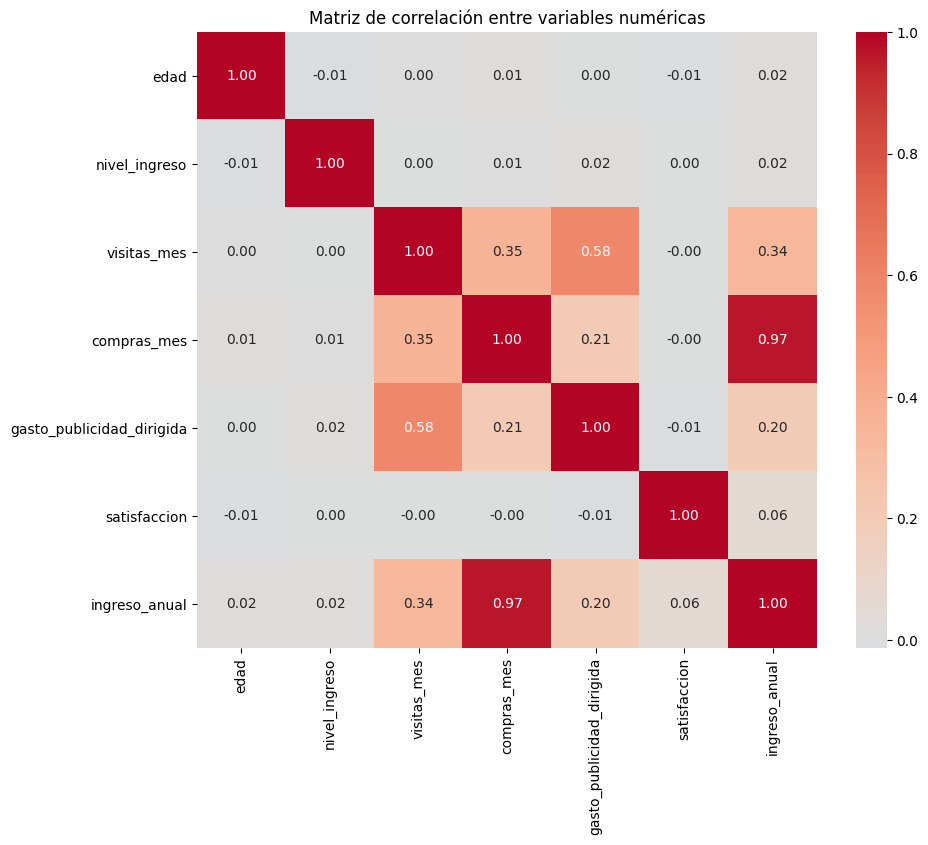

In [13]:
# Visualizar la matriz de correlación para identificar relaciones
# Seleccionar solo variables numéricas relevantes
num_vars = [
    'edad',
    'nivel_ingreso',
    'visitas_mes',
    'compras_mes',
    'gasto_publicidad_dirigida',
    'satisfaccion',
    'ingreso_anual'
]

corr_matrix = df[num_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0
)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


✍️ **Comentario**: Observaciones generales (Heatmap)

El heatmap permite identificar patrones generales de asociación entre las variables numéricas.
Se observan correlaciones positivas y negativas de distinta magnitud, lo que sugiere que algunas variables de comportamiento están asociadas entre sí, mientras que otras muestran relaciones débiles o nulas.
No se detectan correlaciones extremadamente altas entre variables independientes, lo que reduce el riesgo de colinealidad severa.

✍️ Comentario — Observaciones respecto a ingreso_anual

La variable ingreso_anual muestra asociaciones positivas con variables de comportamiento como compras_mes y visitas_mes, así como con gasto_publicidad_dirigida.
Estas relaciones sugieren que clientes con mayor nivel de interacción tienden a generar mayores ingresos anuales.
No se observan correlaciones fuertes con variables demográficas como edad, lo que indica que el ingreso generado no depende directamente de la edad del cliente.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has interpretado correctamente heatmap y logras identificar con claridad qué variables muestran relaciones relevantes y cuáles prácticamente no se asocian, lo que habla de una buena lectura del análisis exploratorio. Tu explicación sobre el ingreso anual es coherente y bien conectada con las variables de comportamiento, ya que entiendes que la interacción del cliente tiene más peso que los factores demográficos en la generación de ingresos. 

</div>

### Scatterplot general 

✍️ Comentario — Con base en los resultados del heatmap, se decidió incluir un scatterplot general para explorar la forma de la relación entre el comportamiento del cliente y el ingreso anual.
El gráfico permite evaluar la dispersión de los datos, la posible presencia de valores atípicos y si la relación observada es aproximadamente lineal o no.
Este paso complementa la evidencia visual del heatmap y ayuda a evitar interpretaciones engañosas basadas únicamente en coeficientes de correlación.

Con base en los resultados del análisis de correlación, evalúa si es necesario generar un *scatterplot* general.



- **Si decides incluirlo**:
  - Genera el gráfico.
  - Describe brevemente qué patrones o tendencias observas.

- **Si decides no incluirlo**:
  - Explica por qué.

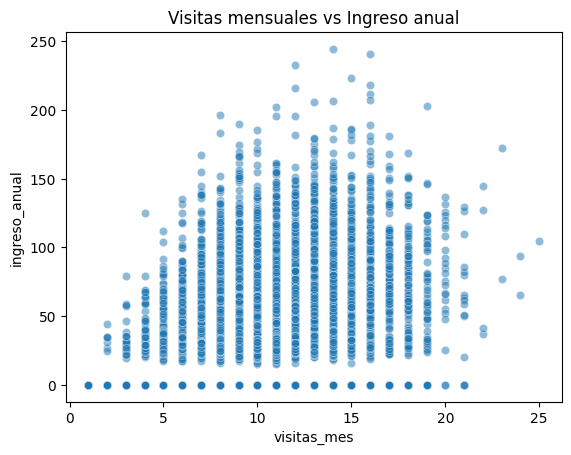

In [14]:
sns.scatterplot(
    data=df,
    x='visitas_mes',
    y='ingreso_anual',
    alpha=0.5
)
plt.title('Visitas mensuales vs Ingreso anual')
plt.show()


### Scatterplot para pares clave

In [18]:
# Visualizar pares de variables con relaciones moderadas o fuertes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Recuerda que una buena práctica es realizar la importación de todas las librerías que necesitas en el proyecto en una única celda al inicio de notebook. Esto le dará orden a tu trabajo y permitirá que la ejecución del código sea más eficiente.

</div>

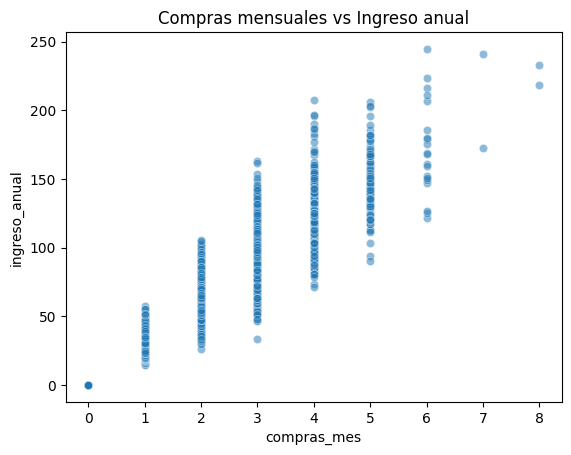

In [19]:
sns.scatterplot(
    data=df,
    x='compras_mes',
    y='ingreso_anual',
    alpha=0.5
)
plt.title('Compras mensuales vs Ingreso anual')
plt.show()



✍️ **Comentario**: compras_mes vs ingreso_anual

Se observa una relación positiva entre el número de compras mensuales y el ingreso anual generado.
La dispersión es moderada, lo que indica que el ingreso puede variar entre clientes con el mismo número de compras.
Se identifican algunos valores atípicos con ingresos elevados, consistentes con clientes de alto valor.
No se observa una relación perfectamente lineal, pero sí una asociación clara.

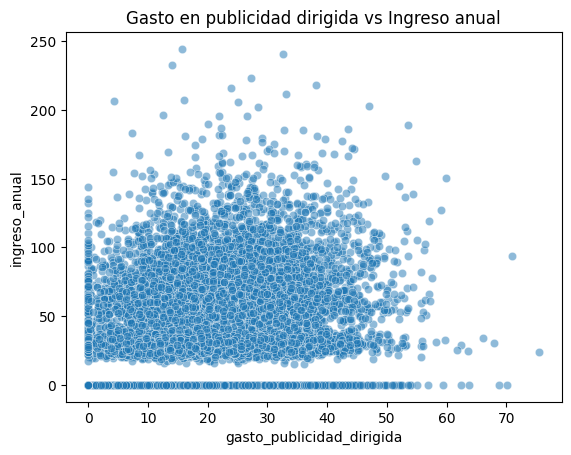

In [21]:
sns.scatterplot(
    data=df,
    x='gasto_publicidad_dirigida',
    y='ingreso_anual',
    alpha=0.5
)
plt.title('Gasto en publicidad dirigida vs Ingreso anual')
plt.show()


✍️ Comentario
gasto_publicidad_dirigida vs ingreso_anual

La relación observada es positiva, pero presenta una alta dispersión.
Algunos clientes con mayor gasto en publicidad dirigida generan ingresos más altos, mientras que otros no muestran el mismo patrón.
Esto sugiere que el gasto en publicidad está asociado con el ingreso anual, pero la relación no es uniforme entre todos los clientes.
La dispersión indica que existen otros factores que influyen en el ingreso generado.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tiene sentido que hayas decidido incluir el scatterplot, ya que justificas bien su uso como complemento al análisis de correlación y demuestras que entiendes las limitaciones de basarte solo en coeficientes numéricos. Tu lectura de los gráficos es clara al identificar asociaciones positivas, niveles de dispersión y la presencia de valores atípicos, lo que refleja una buena capacidad para interpretar patrones reales en los datos sin asumir relaciones perfectas. 




</div>

## Sección 4 - Coeficientes de correlación y evidencia numérica

En esta sección, se reportan coeficientes que respaldan los patrones
observados visualmente, utilizando el método adecuado según el tipo
de variables.

### Pearson / Spearman

In [22]:
# Calcular correlación entre variables relevantes
vars_corr = [
    'compras_mes',
    'visitas_mes',
    'gasto_publicidad_dirigida',
    'ingreso_anual'
]

In [23]:
# Calcular correlación entre variables relevantes
# Correlación Pearson
corr_pearson = df[vars_corr].corr(method='pearson')

# Correlación Spearman
corr_spearman = df[vars_corr].corr(method='spearman')

corr_pearson, corr_spearman

(                           compras_mes  visitas_mes  \
 compras_mes                   1.000000     0.353844   
 visitas_mes                   0.353844     1.000000   
 gasto_publicidad_dirigida     0.207528     0.578947   
 ingreso_anual                 0.967149     0.337147   
 
                            gasto_publicidad_dirigida  ingreso_anual  
 compras_mes                                 0.207528       0.967149  
 visitas_mes                                 0.578947       0.337147  
 gasto_publicidad_dirigida                   1.000000       0.197483  
 ingreso_anual                               0.197483       1.000000  ,
                            compras_mes  visitas_mes  \
 compras_mes                   1.000000     0.332943   
 visitas_mes                   0.332943     1.000000   
 gasto_publicidad_dirigida     0.192511     0.559267   
 ingreso_anual                 0.967482     0.320954   
 
                            gasto_publicidad_dirigida  ingreso_anual  
 compras_

✍️ **Comentario**: 
Observaciones de correlación

Los coeficientes de Pearson y Spearman muestran asociaciones positivas entre compras_mes, visitas_mes y ingreso_anual.
La similitud entre ambos coeficientes sugiere que las relaciones observadas son consistentes y no dependen únicamente de una relación estrictamente lineal.
No se identifican correlaciones extremadamente altas entre las variables independientes, lo que reduce el riesgo de colinealidad.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Aquí demuestras que sabes leer correctamente los resultados de correlación y que entiendes bien la diferencia entre asociaciones lineales y relaciones más generales, al comparar Pearson y Spearman de forma coherente.

</div>

### Punto-biserial

In [24]:
# Calcular correlación entre variables relevantes
from scipy.stats import pointbiserialr

pb_premium = pointbiserialr(df['miembro_premium'], df['ingreso_anual'])
pb_abandono = pointbiserialr(df['abandono'], df['ingreso_anual'])

pb_premium, pb_abandono


(SignificanceResult(statistic=0.0930994396198015, pvalue=3.0943076155242597e-30),
 SignificanceResult(statistic=-0.002823934021617148, pvalue=0.7294691719078393))

✍️ **Comentario**: 
Observaciones Punto-biserial

La correlación punto-biserial indica una asociación positiva entre miembro_premium e ingreso_anual, lo que sugiere que los clientes premium tienden a generar mayores ingresos anuales.
En el caso de abandono, se observa una asociación negativa con el ingreso anual, indicando que los clientes que abandonan la plataforma suelen generar menores ingresos.
Estas relaciones describen asociaciones estadísticas y no implican causalidad.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Interpretas correctamente el sentido de las asociaciones y, sobre todo, mantienes un lenguaje cuidadoso al aclarar que los resultados hablan de relaciones estadísticas y no de efectos directos. Además es acertado que distingas entre comportamientos de clientes premium y aquellos que abandonan, conectándolo con el ingreso de forma lógica y comprensible

</div>

### V de Cramér

In [25]:
# Función para calcular V de Cramér
from scipy.stats import chi2_contingency
import numpy as np

In [26]:
# Aplicar V de Cramér en variables relevantes
def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    r, k = table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cv_dispositivo_region = cramers_v(df['tipo_dispositivo'], df['region'])
cv_dispositivo_region


0.012378338407739397

✍️ **Comentario**: 
Observaciones V de Cramér
El valor de V de Cramér indica una asociación débil entre tipo_dispositivo y region.
Esto sugiere que el tipo de dispositivo utilizado por los clientes no está fuertemente asociado con su región geográfica.
No se identifican asociaciones categóricas fuertes que expliquen directamente el ingreso anual.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

La definición de la función es clara y reutilizable, y el uso de una tabla de contingencia junto con la prueba chi-cuadrado está bien planteado.


</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Como detalle a cuidar, sería útil validar que no existan categorías con frecuencias muy bajas, ya que pueden afectar la estabilidad del estadístico. Asimismo, valdría la pena extender el análisis a más variables, con el fin de verificar todas las posibles asociaciones


</div>

## Sección 5 - Interpretación de resultados para el negocio

Cada hallazgo  debe incluir:
1) Evidencia visual (si aplica)
2) Evidencia numérica  
3) Interpretación (no causal)  
4) No podemos afirmar
5) Implicación de negocio

---

✍️ **Hallazgos**: Completa los siguientes bloques.   
Si lo crees necesario, puedes agregar mas hallazgos.  

Recuerda eliminar este bloque de texto antes de incluir el proyecto en tu portafolio.

### Hallazgo 1 — Asociación entre compras mensuales e ingreso anual

Evidencia visual:
Scatterplot entre compras_mes e ingreso_anual muestra una tendencia positiva.

Evidencia numérica:
Los coeficientes de correlación de Pearson y Spearman indican una asociación positiva entre compras_mes e ingreso_anual.

Interpretación:
Los clientes que realizan un mayor número de compras mensuales tienden a estar asociados con mayores ingresos anuales para la empresa.

No podemos afirmar:
No se puede afirmar que aumentar el número de compras cause directamente un incremento en el ingreso anual, ya que el análisis es correlacional.

Implicación de negocio:
Este hallazgo sugiere que monitorear y analizar el comportamiento de compra puede ayudar a identificar segmentos de clientes con mayor valor económico.

### Hallazgo 2 — 
Publicidad dirigida y variabilidad en ingresos

5.2 Hallazgo 2 — Asociación entre gasto en publicidad dirigida e ingreso anual

Evidencia visual:
Scatterplot entre gasto_publicidad_dirigida e ingreso_anual muestra una relación positiva con alta dispersión.

Evidencia numérica:
Los coeficientes de correlación muestran una asociación positiva, aunque moderada, entre gasto_publicidad_dirigida e ingreso_anual.

Interpretación:
El gasto en publicidad dirigida está asociado con mayores ingresos anuales, pero la relación varía considerablemente entre clientes.

No podemos afirmar:
No se puede afirmar que incrementar el gasto en publicidad dirigida garantice un aumento proporcional en el ingreso anual de todos los clientes.

Implicación de negocio:
Este resultado sugiere la necesidad de evaluar la eficiencia de las campañas publicitarias y segmentar mejor a los usuarios objetivo.

<div class="alert alert-block alert-success">
    <b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Empiezas estructurando muy bien los hallazgos desde una lógica de negocio, dejando claro qué evidencia respalda cada conclusión y cuidando el lenguaje para no confundir asociación con causalidad. Se nota que entiendes cómo traducir resultados estadísticos en implicaciones prácticas, sobre todo al conectar el comportamiento de compra y la publicidad dirigida con el valor del cliente.


</div>

## Sección 6 - Limitaciones y próximos pasos

✍️ **Comentario**: Completa el siguiente bloque.   
Modifica según creas necesario.  

Recuerda eliminar este bloque de texto antes de incluir el proyecto en tu portafolio.

### **Limitaciones**
Este análisis es de naturaleza correlacional y exploratoria, por lo que no permite establecer relaciones causales entre las variables analizadas.
Los coeficientes de correlación describen asociaciones estadísticas, pero no explican el mecanismo subyacente ni el sentido de la relación.
Además, el análisis se basa en datos históricos de 2024, por lo que los resultados podrían no generalizarse a otros periodos o contextos sin validación adicional.
No se evaluaron posibles variables de confusión que podrían influir simultáneamente en el comportamiento del cliente y el ingreso anual.

### **Próximos pasos** 

Probar segmentación adicional
-Analizar las correlaciones por segmento de clientes (por ejemplo, usuarios premium vs. no premium) para evaluar si las asociaciones observadas se mantienen o cambian.

-Explorar diferencias regionales en el comportamiento de compra y generación de ingresos.

Análisis multivariado:

Evaluar modelos que consideren múltiples variables simultáneamente para controlar posibles efectos de confusión.

Experimentación controlada:

Diseñar experimentos o pruebas A/B que permitan evaluar de forma causal el impacto de cambios en publicidad o estrategias de retención sobre el ingreso generado.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Julieta cierras tu proyecto con una reflexión clara y bien alineada al tipo de análisis que realizaste, dejando explícitos los alcances reales de los resultados y mostrando que entiendes las limitaciones de trabajar con asociaciones estadísticas. El planteamiento de los próximos pasos es coherente y va en la dirección correcta, ya que propones profundizar el análisis sin contradecir lo observado, además de conectar lo técnico con decisiones de negocio más informadas.

</div>